In [2]:
import pandas as pd
import numpy as np

# Cambiar etiquetas y dimensiones  de filas y columnas usando reindex
rearregla los datos de acuerdo con un nuevo indice


In [3]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [4]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [5]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e','f'], fill_value=0)
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
f    0.0
dtype: float64

## Method(ffill)

In [8]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index= [0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [9]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

reindex puede alterar las filas, las columnas o ambas

In [12]:

frame = pd.DataFrame(np.arange(9).reshape(3, 3), index= ['a', 'b', 'd'],
                     columns= ['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
b,3,4,5
d,6,7,8


In [13]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,3.0,4.0,5.0
c,NaN,NaN,NaN
d,6.0,7.0,8.0


# Dadas dos series ¿cómo formar con ellas un DataFrame? 
# ... usar pd.concat

In [150]:
s1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
s2 = pd.Series(np.arange(26))

In [151]:
df=pd.concat([s1,s2])
print(df.head())

0    a
1    b
2    c
3    e
4    d
dtype: object


## ... O bien 

In [152]:
df2 = pd.DataFrame({'col1': s1, 'col2': s2})
print(df1.head())

  col1  col2
0    a     0
1    b     1
2    c     2
3    e     3
4    d     4


# Sort

## Método sort_index

In [17]:
obj = pd.Series(range(4), index = ['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [18]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [21]:
frame = pd.DataFrame(np.arange(8).reshape(2, 4), index=['three', 'one'],
                     columns= ['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [22]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [27]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [28]:
frame.sort_index(axis=1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


## Método sort_values

In [29]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [30]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [31]:
obj.sort_values(ascending=False)

1    7
0    4
3    2
2   -3
dtype: int64

Cuando hay Nans (valores perdidos)...

In [33]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [34]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

Para acomodar dataframes es necesario incluir la opción 'by'

In [36]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [41]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [42]:
frame.sort_values(by = ['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [44]:
frame.sort_values(by = list(frame.columns))

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


# Máscaras o filtros
## ¿Cómo obtener los datos en una serie que existan  (o no) en otra serie? 

In [153]:
s1 = pd.Series([1, 2, 3, 4, 5])
s2 = pd.Series([4, 5, 6, 7, 8])

## .isin nos permite averiguar si los elementos de una serie se encuentran en otra

In [160]:
s1.isin(s2)

4     True
1    False
3    False
2    False
dtype: bool

## Asi podemos formar una nueva serie con los elementos comunes

In [161]:
s1[s1.isin(s2)]

4    5
dtype: int64

## ...o el complemento

In [155]:
s1[~s1.isin(s2)]

0    1
1    2
2    3
dtype: int64

# Crear una serie con elementos unicos con unique

In [46]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [47]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

# Contar la frecuencia de un valor en una serie usando .value_counts()

## Sea una serie

In [49]:
s0 = pd.Series(np.random.randint(1, 5, 12))
s0

0     4
1     2
2     4
3     4
4     2
5     1
6     1
7     3
8     1
9     3
10    4
11    2
dtype: int64

# Con el método value_counts vamos a crear una nueva serie s1 cuyos indices son los diferentes valores en s0 y sus valores son las frecuencias de estos. Los valores de s0 quedan ordenados de mayor a menor frecuencia por default 

In [51]:
s1=s0.value_counts(sort=False)
s1

1    3
2    3
3    2
4    4
dtype: int64

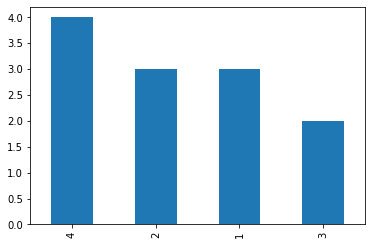

In [53]:
s1=s0.value_counts()
s1.plot(kind='bar')